In [61]:
from impedance import preprocessing
import pandas as pd
import os


data_path = os.path.join("wyniki", "21.txt")

data = pd.read_csv(data_path, sep="\t")


frequencies, Z = data.iloc[:,0], data.iloc[:,1] + 1j*data.iloc[:,2]

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [62]:
data

,f,Zre,Zim
0,0.7,71.1450,-8.68820
1,1.1,71.1450,-8.68820
2,1.7,63.0880,-9.85750
3,4.3,56.3680,-15.74500
4,7.1,43.0760,-19.65300
5,11.3,35.1140,-20.56900
6,28.1,18.2220,-17.46000
7,44.3,12.7070,-14.22700
8,70.9,9.3563,-12.09500
9,112.3,8.4831,-8.75810


In [69]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(Q1,R1)'
initial_guess = [100, .01, 400]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

ValueError: Q not in allowed elements (dict_keys(['s', 'p', 'R', 'C', 'L', 'W', 'Wo', 'Ws', 'CPE', 'La', 'G', 'Gs', 'K', 'Zarc', 'TLMQ', 'T', '__builtins__']))

In [64]:
circuit.fit(frequencies, Z)

In [65]:
circuit.parameters_

array([4.77356761e+00, 1.16487422e-03, 3.18409406e+01, 1.85047135e-04,
       3.27457127e+01])

In [66]:
Z_fit = circuit.predict(frequencies)

In [67]:
Z_fit

array([68.51157776 -5.93175875j, 67.3394402  -9.0281666j ,
       64.90389894-13.01398109j, 52.55152497-21.14142434j,
       43.80799593-22.34413574j, 36.41763025-22.45493486j,
       20.76818597-21.08703353j, 13.58656949-17.42061372j,
        8.84140937-12.58697396j,  6.51835461 -8.47639254j,
        5.49222336 -5.50499877j,  5.06276673 -3.50930276j,
        4.88860672 -2.21769449j,  4.81944363 -1.40155832j,
        4.79179562 -0.88373784j,  4.78081486 -0.55730662j,
        4.77645081 -0.35153334j,  4.77471173 -0.2214493j ])

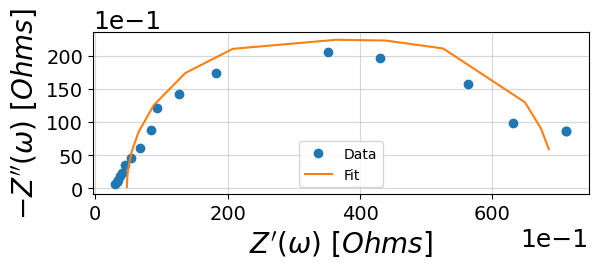

In [68]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()